In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
df_noc = pd.read_csv("datasources/noc_regions.csv")
df = pd.read_csv("datasources/athlete_events.csv")
df = pd.merge(df, df_noc, on = "NOC", how = "left")
df = df[['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games','Year', 'Season', 'City', 'Sport', 'Event', 'Medal', "region"]]
df["Medal"] = df["Medal"].fillna("No Medal")


In [2]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [3]:
#pivot medals and make medal calculations
medals = pd.DataFrame({
    "Medals" : df["Medal"]
})

medals = pd.get_dummies(medals)
df["Bronze"] = medals["Medals_Bronze"]
df["Silver"] = medals["Medals_Silver"]
df["Gold"] = medals["Medals_Gold"]
df["No Win"] = medals["Medals_No Medal"]
df["Attempts"] = df["Bronze"] + df["Silver"] + df["Gold"] + df["No Win"]
df["Wins"] = df["Bronze"] + df["Silver"] + df["Gold"]


In [4]:
team_group = df.groupby(by = ["Team", "Games", "Sport", "Event", "region"], as_index= False).agg({
    "Attempts" : "max",
    "Wins" : "max",
    "Bronze" : "max",
    "Silver" : "max",
    "Gold" : "max",
})

In [5]:
country_group = team_group.groupby(by = "region", as_index= False).agg({
    "Attempts" : "sum",
    "Wins" : "sum",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
})
country_group["Win Rate"] = country_group["Wins"] / country_group["Attempts"]

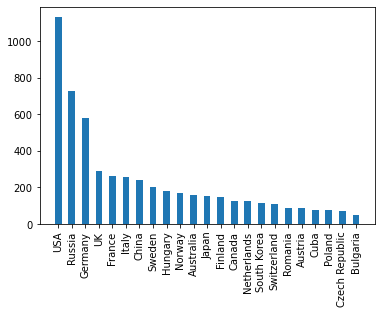

In [6]:
country_group1 = country_group
country_group1 = country_group1.loc[country_group["Gold"]>= 50]
country_group1 = country_group1.sort_values("Gold", ascending= False)
plt.bar(country_group1["region"], country_group1["Gold"], width = .5, align = "center")
plt.xticks(rotation='vertical')
plt.show()

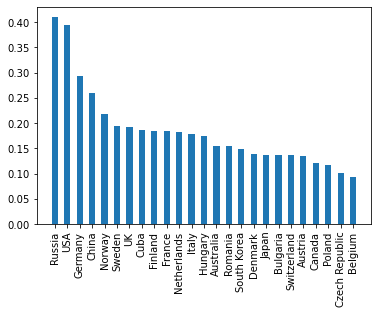

In [7]:
country_group1 = country_group
country_group1 = country_group1.loc[country_group["Wins"]>= 150]
country_group1 = country_group1.sort_values("Win Rate", ascending= False)
plt.bar(country_group1["region"], country_group1["Win Rate"], width = .5, align = "center")
plt.xticks(rotation='vertical')
plt.show()

In [8]:
country_group = country_group.sort_values("Win Rate", ascending = False)
country_group.head(3)

,region,Attempts,Wins,Bronze,Silver,Gold,Win Rate
152,Russia,4030.0,1654.0,589.0,600.0,727.0,0.410422
193,USA,5453.0,2150.0,792.0,901.0,1131.0,0.394278
67,Germany,5405.0,1581.0,597.0,592.0,580.0,0.292507


In [9]:
country_sports = df.groupby(by = ["region", "Sport"], as_index= False).agg({
    "Attempts" : "sum",
    "Wins" : "sum",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
})
country_sports["Win Rate"] = country_sports["Wins"] / country_sports["Attempts"]
country_sports = country_sports.sort_values("Wins", ascending= False)
country_sports.head()

,region,Sport,Attempts,Wins,Bronze,Silver,Gold,Win Rate
3440,USA,Athletics,3211.0,1080.0,221,317.0,542.0,0.336344
3483,USA,Swimming,1638.0,1078.0,175,254.0,649.0,0.658120
1249,Germany,Rowing,916.0,471.0,107,92.0,272.0,0.514192
186,Australia,Swimming,1268.0,412.0,124,165.0,123.0,0.324921
2727,Russia,Gymnastics,1289.0,399.0,81,142.0,176.0,0.309542


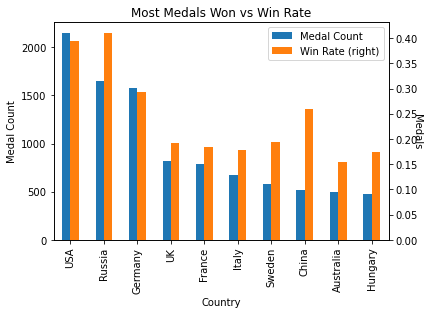

In [10]:
bar_chart = country_group[["region", "Wins", "Win Rate"]]
bar_chart = bar_chart.set_index("region")
bar_chart = bar_chart.nlargest(10, "Wins")
bar_chart = bar_chart.rename(columns={"Wins":"Medal Count", "region":"Country"})
bar_chart = bar_chart.sort_values("Medal Count", ascending=False)
medalsbar = bar_chart.plot(kind="bar", secondary_y = "Win Rate", title=("Most Medals Won vs Win Rate"))
medalsbar.set_ylabel("Medal Count")
medalsbar.set_xlabel("Country")
medalsbar.right_ax.set_ylabel("Medals",rotation = -90)
plt.show()

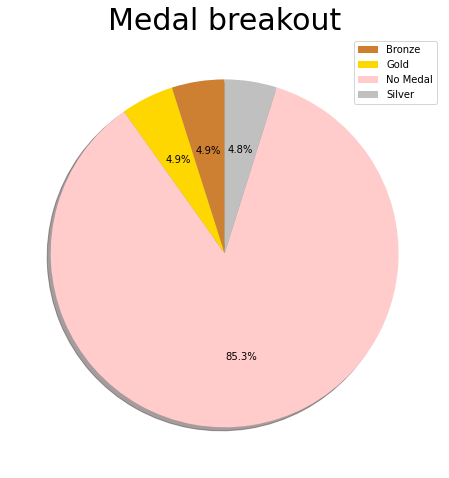

In [36]:
pie_df = df.groupby("Medal").agg({"ID":"count"})
colors= ['#cd7f32','gold', "#ffcccb", "silver"]
piechart = pie_df.plot.pie(y = "ID", labels = None, autopct='%1.1f%%',colors=colors,startangle=90,shadow=True, figsize=(12,8))
piechart.set_ylabel("")
plt.title("Medal breakout", fontsize=30)
plt.savefig("piechart.png")



In [19]:
athletes = df.groupby(["Name", "Sport"],as_index= False).agg({
    "Attempts" : "sum",
    "Wins" : "sum",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
}).sort_values(by = "Wins", ascending= False)
try:
    athletes["Win Rate"] = athletes["Wins"] / athletes["Attempts"]
except:
    0

<Figure size 432x288 with 0 Axes>

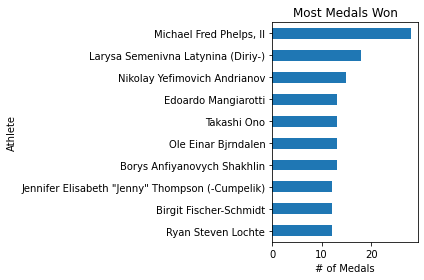

In [37]:
plt.clf()
bar_chart_athlete = athletes[["Name", "Wins"]]
bar_chart_athlete = bar_chart_athlete.set_index("Name")
bar_chart_athlete = bar_chart_athlete.nlargest(10, "Wins")
bar_chart_athlete = bar_chart_athlete.rename(columns={"Wins":"Medal Count", "Name":"Athlete"})
bar_chart_athlete = bar_chart_athlete.sort_values("Medal Count", ascending=True)
medalsbar_athlete = bar_chart_athlete.plot(kind="barh", title=("Most Medals Won"), legend = False)
medalsbar_athlete.set_ylabel("Athlete")
medalsbar_athlete.set_xlabel("# of Medals")
plt.tight_layout()
plt.savefig("Athelete_Bar.png")
plt.show()

In [23]:
athletes.head(10)

,Name,Sport,Attempts,Wins,Bronze,Silver,Gold,Win Rate
87965,"Michael Fred Phelps, II",Swimming,30,28,2,3,23,0.933333
74150,Larysa Semenivna Latynina (Diriy-),Gymnastics,19,18,4,5,9,0.947368
95032,Nikolay Yefimovich Andrianov,Gymnastics,24,15,3,5,7,0.625000
16391,Borys Anfiyanovych Shakhlin,Gymnastics,24,13,2,4,7,0.541667
96448,Ole Einar Bjrndalen,Biathlon,26,13,1,4,8,0.500000
120310,Takashi Ono,Gymnastics,32,13,4,4,5,0.406250
29842,Edoardo Mangiarotti,Fencing,14,13,2,5,6,0.928571
111472,Ryan Steven Lochte,Swimming,14,12,3,3,6,0.857143
15562,Birgit Fischer-Schmidt,Canoeing,13,12,0,4,8,0.923077
58538,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,17,12,1,3,8,0.705882
